In [1]:
import vegas as V
import numpy as np
import matplotlib.pyplot as plt
import corner

# One dimensional integration

In [27]:
def f(x):
    #dx2 = 0
    dx2 = (x - 0.5) ** 2
    return np.exp(-dx2 * 100.) 

# $I = \int_{0.0}^{1.0} dx  \ e^{\left( -100 \ (x-0.5)^2 \right)}$

In [28]:
 x = np.random.uniform(0.,1,1000)

In [29]:
y = f(x)

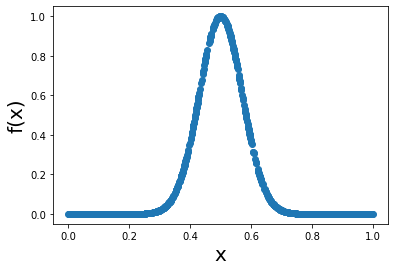

In [30]:
plt.scatter(x,y);
plt.xlabel('x', fontsize=20);
plt.ylabel('f(x)', fontsize=20);

In [25]:
integ = V.Integrator([-2,2])
result = integ(f, nitn=10, neval=1000)

In [26]:
print(result.summary())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.9998(25)      0.9998(25)          0.00     1.00
  2   0.9990(11)      0.9991(10)          0.09     0.76
  3   1.00069(68)     1.00021(57)         0.83     0.44
  4   1.00003(74)     1.00015(45)         0.57     0.64
  5   1.00023(54)     1.00018(35)         0.43     0.79
  6   1.00058(63)     1.00027(30)         0.41     0.85
  7   1.00063(59)     1.00035(27)         0.39     0.89
  8   0.99931(64)     1.00019(25)         0.64     0.72
  9   0.9999(20)      1.00019(25)         0.57     0.81
 10   0.99980(85)     1.00016(24)         0.53     0.86



# Startified sampling with Vegas

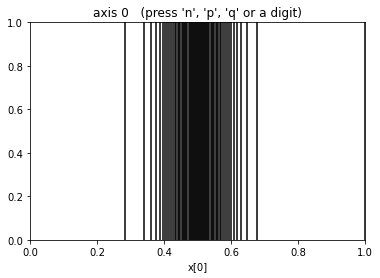

In [8]:
integ.map.show_grid(50,shrink=False)

* integral: is the integration of each individual iteration
* wgt average: Weighted average over all the individual channels
* chi2/dof: $\chi^2$ value to minimize the error in considering the wgt as Gaussian
* Q : P value of the minimization process

# Double check with simple MC code-- No adaptive sampling 

In [9]:
def MC(f,lower_,upper_,nitn,npoints):
    output,samples_,value_= [],[],[]
    for i in range(nitn):
        samples = np.array([np.random.uniform(lower_,upper_) for _ in range(npoints)])
        value = f(samples)
        samples_.append(samples)
        value_.append(value)
        output.append(np.array(value).mean())
    return np.array(output),np.array(output).mean(),np.array(samples_),np.array(value_)


In [39]:
channels, integ_,s,v = MC(f,0,1,500,10000)

In [40]:
print(f'Total integration: {integ_:.3f}')

Total integration: 0.177


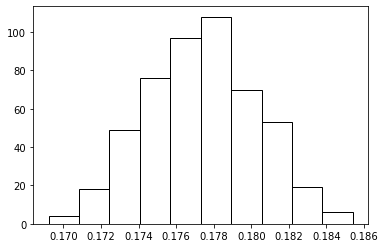

In [41]:
plt.hist(channels,histtype='bar',fill=False);

# Multi-dimension integration

In [13]:
def f1(x):
    dx2 = 0
    for d in range(4):
        dx2 += (x[d] - 0.5) ** 2
    return np.exp(-dx2 * 100.) * 1000

# $I = \int_{0.3}^{0.7} dx_1 \int_{0.3}^{0.7} dx_2 \int_0^1 dx_3 \int_0^1 dx_4 \ e^{\left( -100\sum_{i=1}^4(x_i-0.5)^2 \right)}$

In [14]:
xd = np.column_stack(( np.random.uniform(0.3,0.7,10000), np.random.uniform(0.3,0.7,10000), np.random.uniform(0,1,10000), np.random.uniform(0,1,10000))).T

y1 = f1(xd)

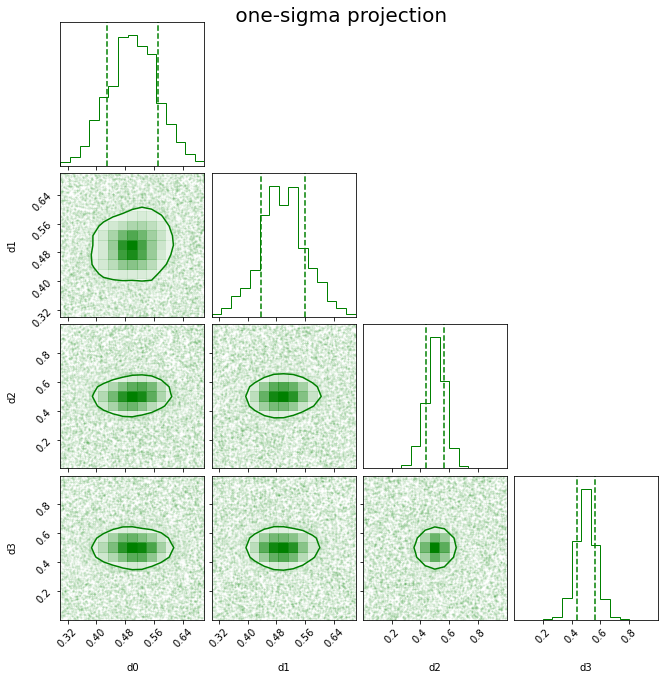

In [23]:
l = ['d0','d1','d2','d3']
fig = corner.corner(xd.T,weights=y1,bins=15,color='green',labels=l,smooth=True,quantiles=(0.16, 0.84), levels=(0.68,),plot_contours=True);
fig.suptitle(" one-sigma projection",fontsize=20);

In [16]:
integ = V.Integrator([[0,1],[0,1],[0,1],[0,1]])
result = integ(f1, nitn=20, neval=1000)

In [17]:
print(result.summary())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.98(37)        0.98(37)            0.00     1.00
  2   0.785(43)       0.787(43)           0.28     0.60
  3   0.992(66)       0.848(36)           3.54     0.03
  4   0.884(39)       0.865(26)           2.51     0.06
  5   0.952(30)       0.902(20)           3.08     0.02
  6   0.994(23)       0.941(15)           4.27     0.00
  7   0.992(17)       0.963(11)           4.39     0.00
  8   1.006(14)       0.9793(89)          4.52     0.00
  9   0.999(12)       0.9861(72)          4.17     0.00
 10   0.995(10)       0.9889(59)          3.76     0.00
 11   0.979(11)       0.9866(52)          3.45     0.00
 12   0.960(12)       0.9821(48)          3.54     0.00
 13   0.993(11)       0.9838(44)          3.31     0.00
 14   0.982(11)       0.9836(40)          3.06     0.00
 15   0.992(12)       0.9844(38)          2.87     0.00
 16   0.998(21)       0.9849(38)          2.70  

# In vegas, computing the integral is done by training it to minimize a total $\chi^2$ function  : $\chi^2 =\sum_i\frac{(I_i-\bar{I})^2}{\sigma}$
with $i$ is the number of dimensions

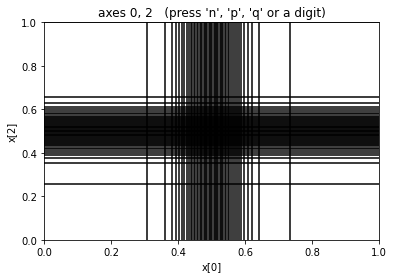

In [35]:
integ.map.show_grid(40,shrink=False,axes=[[0,2],])

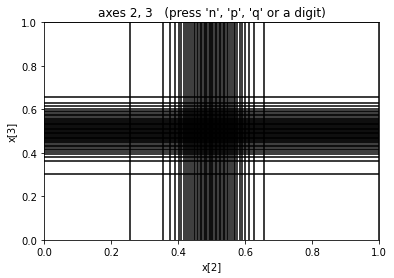

In [22]:
integ.map.show_grid(40,shrink=False,axes=[[2,3],])

In [2]:
def gaussian_function(x):
    return np.exp(-x**2)

In [10]:
integ = V.Integrator([-1,1])
result = integ(gaussian_function, nitn=10, neval=1000)

In [11]:
print(result.summary())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   1.49386(20)     1.49386(20)         0.00     1.00
  2   1.49377(20)     1.49381(14)         0.09     0.76
  3   1.49323(20)     1.49362(12)         2.81     0.06
  4   1.49385(22)     1.49367(10)         2.14     0.09
  5   1.49406(21)     1.493747(92)        2.30     0.06
  6   1.49352(23)     1.493714(85)        2.01     0.07
  7   1.49331(23)     1.493666(80)        2.12     0.05
  8   1.49348(24)     1.493647(76)        1.90     0.07
  9   1.49349(23)     1.493631(72)        1.71     0.09
 10   1.49344(24)     1.493616(69)        1.59     0.11

